In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [93]:
df = pd.read_csv('../data/clean/deliveries.csv')

In [94]:
df.dtypes

id                        object
route_id                  object
state                      int64
_status                   object
items                     object
total_size                 int64
pickupLat                float64
pickupLng                float64
deliveryLat              float64
deliveryLng              float64
pickup_dt                 object
max_pickup_dt             object
pickup_arrival_dt         object
pickup_effective_dt       object
delivery_dt               object
max_delivery_dt           object
delivery_arrival_dt       object
delivery_effective_dt     object
cost                     float64
final_price              float64
distance                 float64
shipper_id               float64
distance_charged         float64
distance_route           float64
total_package_price      float64
vehicle_capacity         float64
dtype: object

In [95]:
df.head()

,id,route_id,state,_status,items,total_size,pickupLat,pickupLng,deliveryLat,deliveryLng,...,delivery_arrival_dt,delivery_effective_dt,cost,final_price,distance,shipper_id,distance_charged,distance_route,total_package_price,vehicle_capacity
0,t-amabrt-1743660,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004818881','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4522,-44.2543,...,2022-05-02 15:49:13,2022-05-02 15:52:13,4.47,5.76,72.2,247379.0,0.3,0.3,19.72,2.0
1,t-amabrt-1743661,r-shiinc-1248060,7,completed,"[{'id':'SFYBR004812869','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8932,-43.9991,...,2022-05-02 17:14:51,2022-05-02 17:16:29,2.99,6.87,12.2,222936.0,0.2,0.2,30.04,2.0
2,t-amabrt-1743662,r-shiinc-1248042,7,completed,"[{'id':'SFYBR004809553','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8820,-44.0004,...,2022-05-02 19:13:07,2022-05-02 19:14:19,2.99,4.87,13.3,348598.0,0.4,0.4,39.60,2.0
3,t-amabrt-1743663,r-shiinc-1248032,7,completed,"[{'id':'SFYBR004808848','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.7904,-43.9844,...,2022-05-02 20:52:14,2022-05-02 20:56:31,2.99,4.80,27.7,393179.0,0.9,0.9,30.63,2.0
4,t-amabrt-1743664,r-shiinc-1248067,7,completed,"[{'id':'SFYBR004808369','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8798,-43.9029,...,2022-05-02 17:21:59,2022-05-02 17:27:24,2.99,5.94,18.9,269174.0,0.0,0.0,4.90,2.0


Ver la distribucion de las distancias por ruta por tipo de vehiculos.
displot o boxplot de la distribucion de distancias, faceted uno por cada vehiculo

In [96]:
df_routes = pd.read_csv('../data/clean/routes.csv')

In [97]:
df_routes["route_capacity"].value_counts()

3    2733
2     116
4      64
5      20
1       2
Name: route_capacity, dtype: int64

In [98]:
df = df.merge(df_routes, on='route_id', how='inner')

In [99]:
df.head()

,id,route_id,state,_status,items,total_size,pickupLat,pickupLng,deliveryLat,deliveryLng,...,delivery_effective_dt,cost,final_price,distance,shipper_id,distance_charged,distance_route,total_package_price,vehicle_capacity,route_capacity
0,t-amabrt-1743660,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004818881','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4522,-44.2543,...,2022-05-02 15:52:13,4.47,5.76,72.2,247379.0,0.3,0.3,19.72,2.0,3
1,t-amabrt-1743667,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004810225','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4372,-44.2292,...,2022-05-02 17:30:26,4.47,5.76,74.7,247379.0,0.6,0.6,39.90,2.0,3
2,t-amabrt-1743673,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004807779','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4381,-44.2479,...,2022-05-02 16:54:58,4.47,5.84,73.5,247379.0,0.7,0.7,30.23,2.0,3
3,t-amabrt-1743742,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004819106','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4258,-44.2426,...,2022-05-02 18:43:58,4.47,5.84,74.6,247379.0,0.6,0.6,41.44,2.0,3
4,t-amabrt-1743835,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004811623','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4434,-44.2558,...,2022-05-02 16:33:04,4.47,7.97,72.2,247379.0,0.3,0.3,84.79,2.0,3


In [100]:
distance_routes_vehicles = df.groupby(['route_id', 'route_capacity']).agg({'distance_route': 'sum'})

In [101]:
distance_routes_vehicles.reset_index(inplace=True)

In [102]:
distance_routes_vehicles = distance_routes_vehicles.loc[distance_routes_vehicles["distance_route"] > 0]

In [103]:
IQR = distance_routes_vehicles['distance_route'].quantile(0.75) - distance_routes_vehicles['distance_route'].quantile(0.25)
distance_routes_vehicles = distance_routes_vehicles.loc[np.abs(distance_routes_vehicles['distance_route'] - distance_routes_vehicles['distance_route'].mean()) < (1.5 * IQR)]

In [104]:
distance_routes_vehicles

,route_id,route_capacity,distance_route
0,r-shiinc-1246958,3,25.3
1,r-shiinc-1246971,3,56.0
2,r-shiinc-1247025,3,25.7
3,r-shiinc-1247028,3,19.4
4,r-shiinc-1247029,3,21.0
...,...,...,...
2930,r-shiinc-1318979,3,0.7
2931,r-shiinc-1318988,3,0.8
2932,r-shiinc-1318998,3,0.1
2933,r-shiinc-1319014,3,2.1


In [105]:
distance_routes_vehicles["route_capacity"].value_counts()

3    2530
2     113
4      64
5      20
1       2
Name: route_capacity, dtype: int64

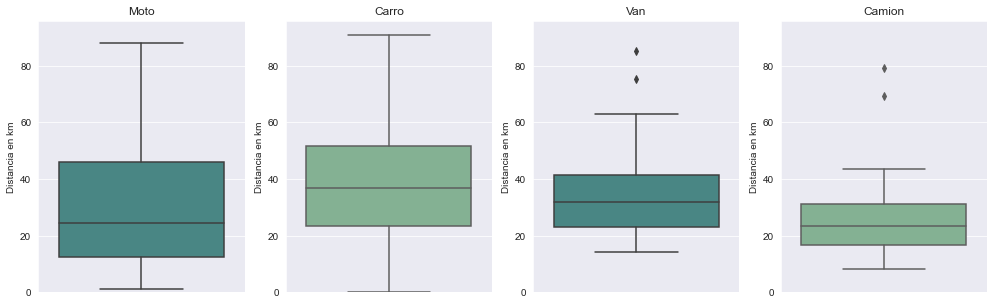

In [106]:
min_value = min(distance_routes_vehicles['distance_route'].min(), 0)
max_value = distance_routes_vehicles['distance_route'].max() + 5
sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(17, 5))
data_moto = distance_routes_vehicles.loc[distance_routes_vehicles['route_capacity'] == 2]
data_car = distance_routes_vehicles.loc[distance_routes_vehicles['route_capacity'] == 3]
data_van = distance_routes_vehicles.loc[distance_routes_vehicles['route_capacity'] == 4]
data_truck = distance_routes_vehicles.loc[distance_routes_vehicles['route_capacity'] == 5]
sns.boxplot(y=data_moto["distance_route"], ax=axs[0], color='#3f908e')
sns.boxplot(y=data_car["distance_route"], ax=axs[1], color='#7cb990')
sns.boxplot(y=data_van["distance_route"], ax=axs[2], color='#3f908e')
sns.boxplot(y=data_truck["distance_route"], ax=axs[3], color='#7cb990')
axs[0].set_title('Moto')
axs[1].set_title('Carro')
axs[2].set_title('Van')
axs[3].set_title('Camion')
for ax in axs:
  ax.set_ylabel('Distancia en km')
  ax.set_ylim(min_value, max_value)

Ver si existe una relación entre el retraso de pickup y dropoff. 
Scatterplot

In [107]:
df["max_pickup_dt"] = pd.to_datetime(df["max_pickup_dt"])
df["pickup_effective_dt"] = pd.to_datetime(df["pickup_effective_dt"])
df["max_delivery_dt"] = pd.to_datetime(df["max_delivery_dt"])
df["delivery_effective_dt"] = pd.to_datetime(df["delivery_effective_dt"])

In [108]:
df["pickup_delay"] = (df["pickup_effective_dt"] - df["max_pickup_dt"]).dt.total_seconds() / 3600
df["delivery_delay"] = (df["delivery_effective_dt"] - df["max_delivery_dt"]).dt.total_seconds() / 3600

In [109]:
df_rel = df[['id', 'pickup_delay', 'delivery_delay']]
df_rel = df_rel.loc[(np.abs(stats.zscore(df_rel['pickup_delay'])) < 3) & (np.abs(stats.zscore(df_rel['delivery_delay'])) < 3)]

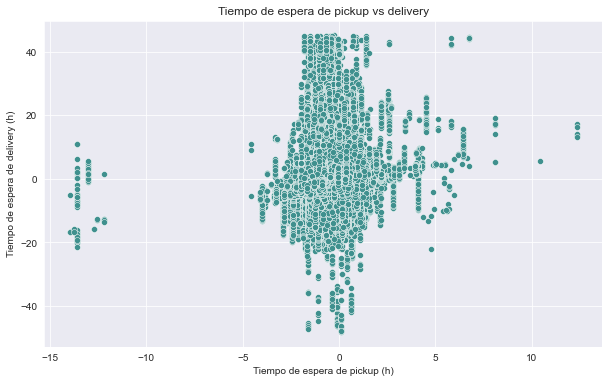

In [110]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="pickup_delay", y="delivery_delay", data=df_rel, ax=axs, color='#3f908e')
axs.set_xlabel('Tiempo de espera de pickup (h)')
axs.set_ylabel('Tiempo de espera de delivery (h)')
_ = axs.set_title('Tiempo de espera de pickup vs delivery')

In [111]:
df_rel["pickup_delay"].corr(df_rel["delivery_delay"])

0.1234701816466346

Existe una relación entre el cost/km y la cantidad de horas de retraso.
ScatterploT

In [112]:
cost_km_routes = df.groupby(['route_id']).agg({'distance_route': 'sum', 'cost': 'sum'}).reset_index()

In [113]:
(cost_km_routes["distance_route"] == 0).sum()

5

In [114]:
cost_km_routes.loc[cost_km_routes["distance_route"] == 0, "distance_route"] = cost_km_routes["distance_route"].mean()

In [115]:
cost_km_routes["cost_km"] = cost_km_routes["cost"] / cost_km_routes["distance_route"]

In [116]:
df = df.merge(cost_km_routes, on='route_id', how='inner')

In [117]:
df_rel = df[['id', 'delivery_delay', 'cost_km']]
df_rel = df_rel.loc[(np.abs(stats.zscore(df_rel['delivery_delay'])) < 3) & (np.abs(stats.zscore(df_rel['cost_km'])) < 3)]

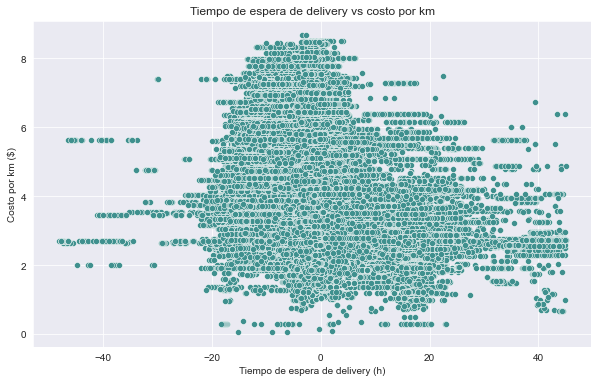

In [120]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="delivery_delay", y="cost_km", data=df_rel, ax=axs, color='#3f908e')
axs.set_xlabel('Tiempo de espera de delivery (h)')
axs.set_ylabel('Costo por km ($)')
_ = axs.set_title('Tiempo de espera de delivery vs costo por km')

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_delay', ylabel='Density'>

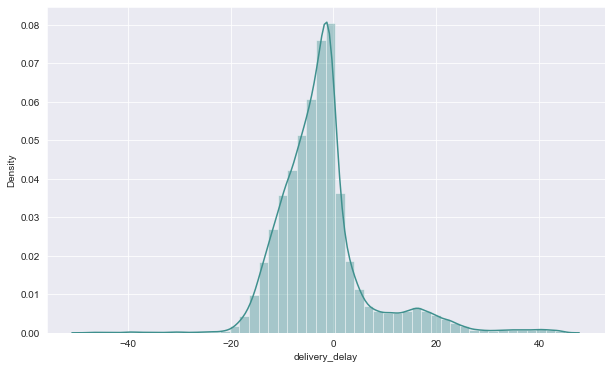

In [123]:
fig, axs = plt.subplots(figsize=(10, 6))
# Distribucion de los tiempos de espera de delivery
sns.distplot(df_rel["delivery_delay"], ax=axs, color='#3f908e')

In [119]:
df_rel["delivery_delay"].corr(df_rel["cost_km"])

-0.2046927069739054